In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [2]:
newdf = pd.read_csv("datasets/retail_sales_dataset.csv")
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf = newdf.sort_values(by="Date", ascending=True)
newdf.rename(
    columns={
        "Date":'ds',
        "Total Amount": 'y'
    },inplace=True
)
mm = Prophet()
mm.fit(newdf)
future = mm.make_future_dataframe(periods=10)
future.tail()
forecast = mm.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

08:48:30 - cmdstanpy - INFO - Chain [1] start processing
08:48:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
350,2024-01-07,420.117435,-298.554446,1159.194758
351,2024-01-08,476.660211,-229.977233,1155.159036
352,2024-01-09,426.972324,-260.934660,1171.497419
353,2024-01-10,418.565253,-281.315135,1139.400360
354,2024-01-11,434.083001,-284.415349,1112.600100


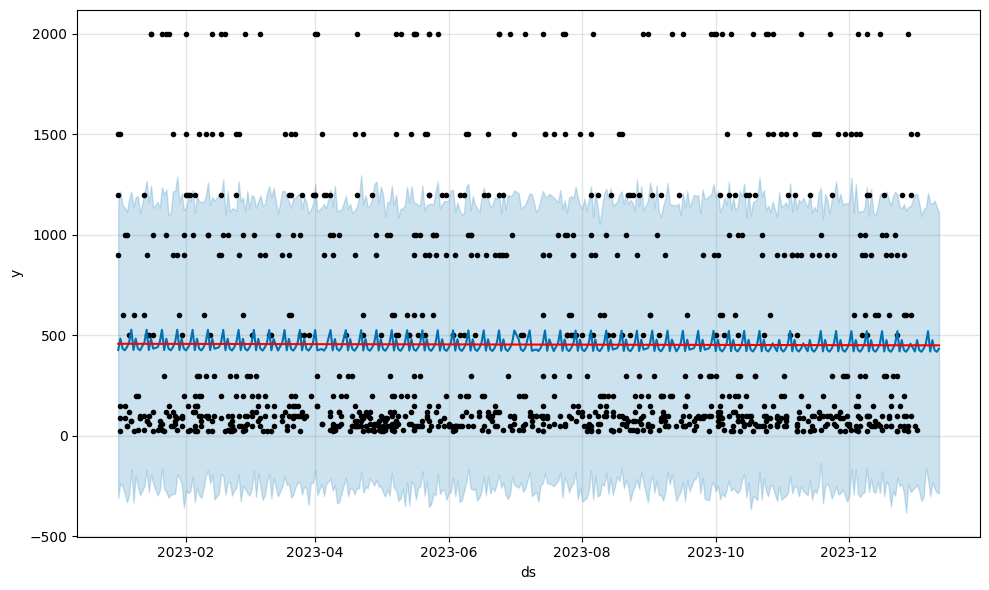

In [4]:
fig1 = mm.plot(forecast)
plt.plot(forecast['ds'], forecast['trend'], color='red')

In [5]:
x1_min, x1_max = forecast['yhat_lower'].mean(), forecast['yhat_upper'].mean()
x2_min, x2_max = forecast['yhat'].max(), forecast['yhat'].min()

In [12]:
def map_value(value, x1_min, x1_max, x2_min, x2_max):
    if x1_max == x1_min:
        raise ValueError("Source range min and max cannot be equal.")
    return x2_min + ((value - x1_min) / (x1_max - x1_min)) * (x2_max - x2_min)

sensitive_vals = []
sensitive_dates = []
for i in forecast.iloc():
    neg = -1
    if i['trend'] >= i['yhat']:
        neg*=-1
    mpvalue = map_value(i['yhat'], x2_min, x2_max, x1_min, x1_max)
    sensitive_vals.append(mpvalue)

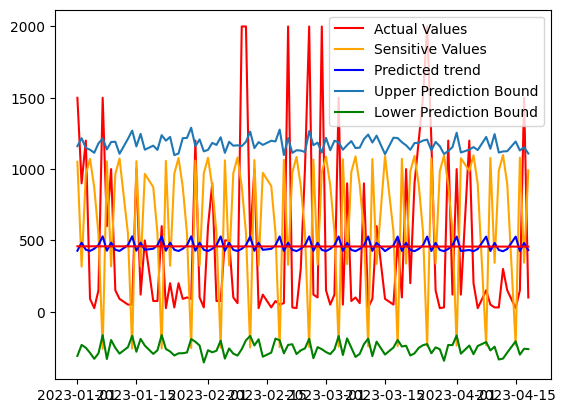

In [13]:
import matplotlib.pyplot as plt

plt.plot(forecast['ds'][:100], newdf['y'][:100], color='red', label="Actual Values")
plt.plot(forecast['ds'][:100], sensitive_vals[:100], color='orange', label="Sensitive Values")
plt.plot(forecast['ds'][:100], forecast['yhat'][:100], color='blue', label="Predicted trend")
plt.plot(forecast['ds'][:100], forecast['yhat_upper'][:100], label="Upper Prediction Bound")
plt.plot(forecast['ds'][:100], forecast['yhat_lower'][:100], color='green', label="Lower Prediction Bound")
plt.plot(forecast['ds'][:100], forecast['trend'][:100], color='red')

plt.legend()  
plt.show()

08:55:57 - cmdstanpy - INFO - Chain [1] start processing
08:55:58 - cmdstanpy - INFO - Chain [1] done processing


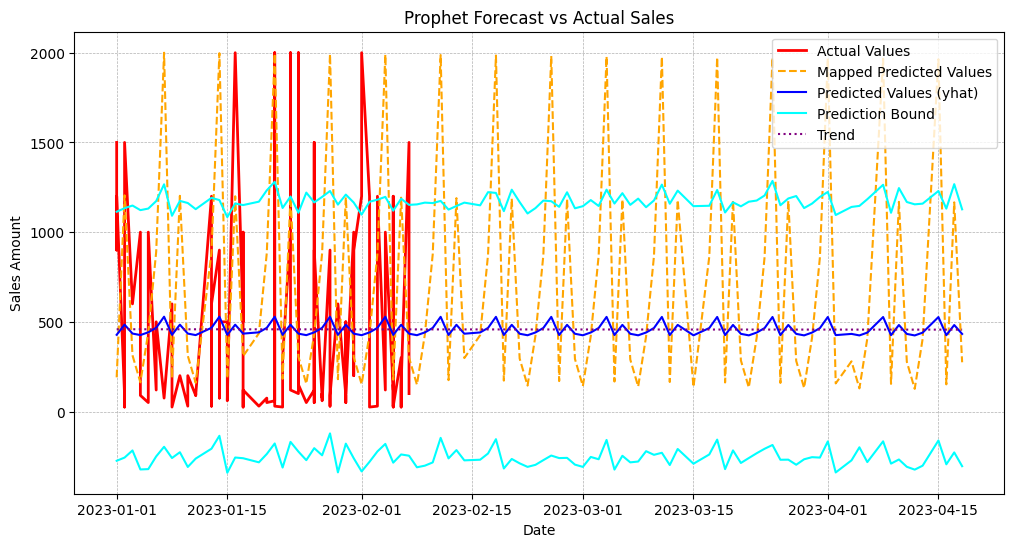

In [14]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# --- Your initial setup code (unchanged) ---
newdf = pd.read_csv("datasets/retail_sales_dataset.csv")
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf = newdf.sort_values(by="Date", ascending=True)
newdf.rename(
    columns={
        "Date": 'ds',
        "Total Amount": 'y'
    }, inplace=True
)
mm = Prophet()
mm.fit(newdf)
future = mm.make_future_dataframe(periods=10)
forecast = mm.predict(future)

# --- The mapping function (unchanged) ---
def map_value(value, x1_min, x1_max, x2_min, x2_max):
    if x1_max == x1_min:
        raise ValueError("Source range min and max cannot be equal.")
    return x2_min + ((value - x1_min) / (x1_max - x1_min)) * (x2_max - x2_min)

# --- CORRECTED MAPPING LOGIC ---

# 1. DEFINE the missing min/max variables
# Range of the actual data
y_min = newdf['y'].min()
y_max = newdf['y'].max()

# Range of the predicted data
yhat_min = forecast['yhat'].min()
yhat_max = forecast['yhat'].max()


sensitive_vals = []
# Loop over the forecast rows
for index, row in forecast.iterrows():
    # 2. CORRECT the map_value call (map from yhat's range to y's range)
    # This maps the prediction back into the scale of the original data.
    mpvalue = map_value(row['yhat'], yhat_min, yhat_max, y_min, y_max)
    sensitive_vals.append(mpvalue)

# Add the new values to the dataframe for easier plotting
forecast['sensitive_vals'] = sensitive_vals

# --- CORRECTED PLOTTING ---
plt.figure(figsize=(12, 6)) # Make the plot bigger

# Plot the first 100 days for clarity
plt.plot(newdf['ds'][:100], newdf['y'][:100], color='red', label="Actual Values", linewidth=2)
plt.plot(forecast['ds'][:100], forecast['sensitive_vals'][:100], color='orange', label="Mapped Predicted Values", linestyle='--')
plt.plot(forecast['ds'][:100], forecast['yhat'][:100], color='blue', label="Predicted Values (yhat)")
plt.plot(forecast['ds'][:100], forecast['yhat_upper'][:100], color='cyan', label="Prediction Bound")
plt.plot(forecast['ds'][:100], forecast['yhat_lower'][:100], color='cyan')
plt.plot(forecast['ds'][:100], forecast['trend'][:100], color='purple', label="Trend", linestyle=':')


plt.legend()
plt.title("Prophet Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [16]:
df = pd.read_csv("./datasets/Retail_Transactions_Dataset.csv")
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [18]:
df.drop(columns=['Transaction_ID', 'Customer_Name', 'Payment_Method', 'City', 'Store_Type', 'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'], inplace=True)

In [22]:
df.iloc()[0]['Product']

"['Ketchup', 'Shaving Cream', 'Light Bulbs']"

In [24]:
import ast
df['Product'] = df["Product"].apply(ast.literal_eval)

In [25]:
expanded_df = df.explode('Product')

In [27]:
expanded_df.head()

,Date,Product,Total_Items,Total_Cost
0,2022-01-21 06:27:29,Ketchup,3,71.65
0,2022-01-21 06:27:29,Shaving Cream,3,71.65
0,2022-01-21 06:27:29,Light Bulbs,3,71.65
1,2023-03-01 13:01:21,Ice Cream,2,25.93
1,2023-03-01 13:01:21,Milk,2,25.93


In [33]:
df = expanded_df

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
df['Date'] = df['Date'].dt.date

In [36]:
df.head()

,Date,Product,Total_Items,Total_Cost
0,2022-01-21,Ketchup,3,71.65
0,2022-01-21,Shaving Cream,3,71.65
0,2022-01-21,Light Bulbs,3,71.65
1,2023-03-01,Ice Cream,2,25.93
1,2023-03-01,Milk,2,25.93


In [38]:
df['Product'].nunique()

81

In [39]:
df = df.sort_values(by="Date", ignore_index=True)

In [40]:
df.head()

,Date,Product,Total_Items,Total_Cost
0,2020-01-01,Tomatoes,3,87.11
1,2020-01-01,Chicken,8,88.64
2,2020-01-01,Dish Soap,7,32.51
3,2020-01-01,Cleaning Rags,5,62.65
4,2020-01-01,Trash Bags,5,62.65


In [48]:
newdf = df[df['Product']=='Tomatoes']
newdf.shape

(36667, 4)

In [49]:
newdf.drop(columns=['Total_Items', 'Total_Cost'],inplace=True)

C:\Users\Tejas\AppData\Local\Temp\ipykernel_24904\3325562881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(columns=['Total_Items', 'Total_Cost'],inplace=True)


In [50]:
newdf.head()

,Date,Product
0,2020-01-01,Tomatoes
9,2020-01-01,Tomatoes
110,2020-01-01,Tomatoes
150,2020-01-01,Tomatoes
199,2020-01-01,Tomatoes


In [53]:
newdf.head()

,ds,y
0,2020-01-01,Tomatoes
9,2020-01-01,Tomatoes
110,2020-01-01,Tomatoes
150,2020-01-01,Tomatoes
199,2020-01-01,Tomatoes


In [54]:
daily_counts = newdf.groupby("ds").size().reset_index(name="entries")

In [55]:
daily_counts.head()

,ds,entries
0,2020-01-01,28
1,2020-01-02,21
2,2020-01-03,18
3,2020-01-04,23
4,2020-01-05,18


10:10:43 - cmdstanpy - INFO - Chain [1] start processing
10:10:43 - cmdstanpy - INFO - Chain [1] done processing


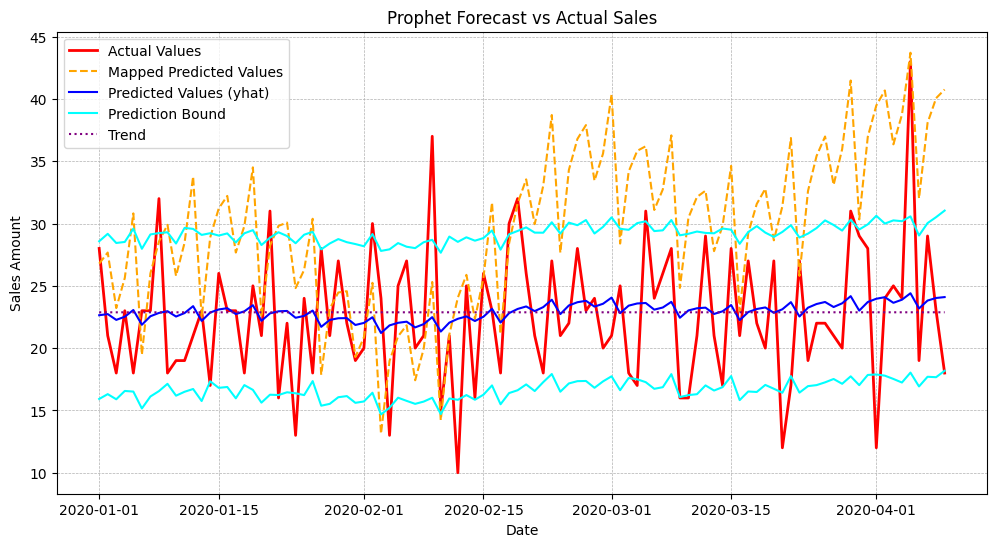

In [57]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# --- Your initial setup code (unchanged) ---
# newdf = pd.read_csv("datasets/retail_sales_dataset.csv")
# newdf['Date'] = pd.to_datetime(newdf['Date'])
# newdf = newdf.sort_values(by="Date", ascending=True)
newdf = daily_counts
newdf.rename(
    columns={
        "Date": 'ds',
        "entries": 'y'
    }, inplace=True
)
mm = Prophet()
mm.fit(newdf)
future = mm.make_future_dataframe(periods=10)
forecast = mm.predict(future)

# --- The mapping function (unchanged) ---
def map_value(value, x1_min, x1_max, x2_min, x2_max):
    if x1_max == x1_min:
        raise ValueError("Source range min and max cannot be equal.")
    return x2_min + ((value - x1_min) / (x1_max - x1_min)) * (x2_max - x2_min)

# --- CORRECTED MAPPING LOGIC ---

# 1. DEFINE the missing min/max variables
# Range of the actual data
y_min = newdf['y'].min()
y_max = newdf['y'].max()

# Range of the predicted data
yhat_min = forecast['yhat'].min()
yhat_max = forecast['yhat'].max()


sensitive_vals = []
# Loop over the forecast rows
for index, row in forecast.iterrows():
    # 2. CORRECT the map_value call (map from yhat's range to y's range)
    # This maps the prediction back into the scale of the original data.
    mpvalue = map_value(row['yhat'], yhat_min, yhat_max, y_min, y_max)
    sensitive_vals.append(mpvalue)

# Add the new values to the dataframe for easier plotting
forecast['sensitive_vals'] = sensitive_vals

# --- CORRECTED PLOTTING ---
plt.figure(figsize=(12, 6)) # Make the plot bigger

# Plot the first 100 days for clarity
plt.plot(newdf['ds'][:100], newdf['y'][:100], color='red', label="Actual Values", linewidth=2)
plt.plot(forecast['ds'][:100], forecast['sensitive_vals'][:100], color='orange', label="Mapped Predicted Values", linestyle='--')
plt.plot(forecast['ds'][:100], forecast['yhat'][:100], color='blue', label="Predicted Values (yhat)")
plt.plot(forecast['ds'][:100], forecast['yhat_upper'][:100], color='cyan', label="Prediction Bound")
plt.plot(forecast['ds'][:100], forecast['yhat_lower'][:100], color='cyan')
plt.plot(forecast['ds'][:100], forecast['trend'][:100], color='purple', label="Trend", linestyle=':')


plt.legend()
plt.title("Prophet Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# Ensure both ds columns are datetime
newdf['ds'] = pd.to_datetime(newdf['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Now merge
merged = pd.merge(newdf, forecast[['ds', 'yhat']], on='ds', how='inner')

# Actual and Predicted values
y_true = merged['y']
y_pred = merged['yhat']

from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_true, y_pred) * 100


print(f"MAPE (lower is better): {mape:.2f}%")
print(f"Forecast Accuracy: {100 - mape:.2f}%")


MAPE (lower is better): 18.34%
R² Score (higher is better): 2.31%
Forecast Accuracy: 81.66%
